In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the file and assign the data to the customer_data variable

In [ ]:
customer_data = pd.read_excel('marketing_campaign1.xlsx')

Explore the data

In [ ]:
customer_data.describe

In [ ]:
customer_data.dtypes

In [ ]:
customer_data.shape

Separate columns that contain numeric data from columns that do not contain numeric data,
in case we want to apply any cleaning procedure.

In [ ]:
numeric_columns = customer_data.select_dtypes(include=[np.number])

In [ ]:
nonNumeric_columns = customer_data.select_dtypes(exclude=[np.number])

Search if columns contain missing data (no missing data in current dataset)

In [ ]:
for col in customer_data.columns:
    no_values_pct = np.mean(customer_data[col].isnull())
    print(f'{col} - {round(no_values_pct*100)}')

Explore data measures in the numeric columns. Useful for discovering possible outlier values, always according to context

In [ ]:
for col in numeric_columns.columns:
    description = numeric_columns[col].describe()
    print(f'Column: {col}\n{description}\n\n')

Create groups of people and explore their attributes

In [ ]:
marital_status_grouping = customer_data.groupby('Marital_Status')

In [ ]:
marital_status_grouping.size()

In [ ]:
marital_status_grouping.Income.mean()

In [ ]:
marital_status_grouping.NumDealsPurchases.sum()

Plot the result of total Deals purchased by individuals in each marital status

In [33]:
msg = marital_status_grouping.NumDealsPurchases.sum()

<AxesSubplot:title={'center':'Who seek deals?'}, xlabel='Marital Status', ylabel='Total purchases'>

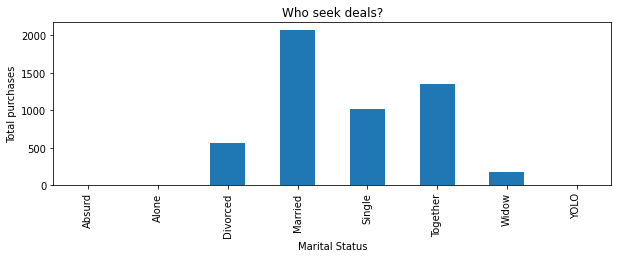

In [41]:
msg.plot(kind='bar', title='Who seek deals?', xlabel='Marital Status', ylabel='Total purchases', figsize=(10,3))

Drop duplicate values. ID is the unique value of each customer so we are dropping duplicate ID's

In [25]:
customer_data_unique = customer_data.drop('ID', axis=1).drop_duplicates()